# Proyeto
# Telecomunicaciones: identificar operadores ineficaces


# Análisis y Detección de Operadores Ineficaces en CallMeMaybe

## Introducción 

CallMeMaybe es un servicio de telefonía virtual utilizado por diversas organizaciones para gestionar llamadas entrantes y salientes de manera eficiente. La calidad del servicio prestado depende en gran medida del desempeño de los operadores, quienes manejan grandes volúmenes de llamadas a diario. Sin embargo, algunos operadores pueden ser menos eficaces, lo que impacta la experiencia del cliente y la productividad general.

Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

## Objetivo

El objetivo de este proyecto es proporcionar información clave, a través del análisis de datos, pruebas estadísticas y visualizaciones en un dashboard, que permita a los supervisores identificar a los operadores con bajo rendimiento; y poder tomar decisiones estratégicas para mejorar la eficiencia operativa .

## Descripción de los datos 

Los datasets contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe. Sus clientes son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a través de sus operadores. Los operadores también pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a través de la red de CallMeMaybe.

El dataset comprimido `telecom_dataset_us.csv` contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

 

El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

## Desarrollo

1. Análisis Exploratorio de Datos (EDA)
- Examinar la estructura y calidad de los datos.
    - Cargar los datasets en Python con pandas.
    - Explorar las primeras filas de los datos (df.head()).
    - Verificar valores nulos o duplicados.
    - Revisar tipos de datos y convertirlos si es necesario.

- Identificar patrones en el comportamiento de los operadores.
- Evaluar la distribución de llamadas, tiempos de espera y llamadas perdidas.

- Analizar distribuciones de llamadas, tiempos de espera y llamadas perdidas con gráficos


2. Identificación de Operadores Ineficaces
- Definir métricas clave para evaluar el desempeño de los operadores.
    - Porcentaje de llamadas perdidas 
    - Tiempo promedio de espera
    - Número total de llamadas salientes (para operadores que deben realizarlas).
- Establecer umbrales para clasificar operadores como eficaces o ineficaces.
    - Filtrar operadores con más del 30% de llamadas perdidas.
    - Identificar operadores con tiempos de espera mayores a 60 segundos.
    - Revisar operadores con muy pocas llamadas salientes.
- Visualizar y analizar tendencias en la ineficacia de los operadores.


3. Pruebas de Hipótesis

Comprobar si hay relaciones significativas entre las métricas.

- Hipótesis 1: ¿Los operadores con más llamadas perdidas tienen tiempos de espera más altos?
- Hipótesis 2: ¿Los operadores con pocas llamadas salientes tienen más llamadas perdidas?
- Hipótesis 3: ¿El plan tarifario afecta la cantidad de llamadas?


4. Recomendaciones y Mejoras

Notificar a los supervisores sobre el análisis de operadores con bajo rendimiento.

In [1]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Analisis exploratorio de datos

In [2]:
# Cargar los datasets /mnt/data
dataset_1 = '/datasets/telecom_dataset_us.csv'
dataset_2 = '/datasets/telecom_clients_us.csv'

In [3]:
df_llamadas = pd.read_csv(dataset_1)
df_clientes = pd.read_csv(dataset_2)

###### Análisis del dataset 'llamadas'

In [4]:
df_llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [5]:
print('Datos ausentes: \n', df_llamadas.isna().sum())

Datos ausentes: 
 user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64


In [6]:
print('Datos duplicados en el dataset llamadas: ', df_llamadas.duplicated().sum())

Datos duplicados en el dataset llamadas:  4900


In [7]:
# Eliminar duplicados
df_llamadas = df_llamadas.drop_duplicates()

In [8]:
print('Datos duplicados en el dataset llamadas: ', df_llamadas.duplicated().sum())

Datos duplicados en el dataset llamadas:  0


In [9]:
df_llamadas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49002 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              49002 non-null  int64  
 1   date                 49002 non-null  object 
 2   direction            49002 non-null  object 
 3   internal             48892 non-null  object 
 4   operator_id          41546 non-null  float64
 5   is_missed_call       49002 non-null  bool   
 6   calls_count          49002 non-null  int64  
 7   call_duration        49002 non-null  int64  
 8   total_call_duration  49002 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.4+ MB


In [10]:
print('Datos ausentes: \n', df_llamadas.isna().sum())

Datos ausentes: 
 user_id                   0
date                      0
direction                 0
internal                110
operator_id            7456
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64


In [11]:
df_llamadas.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [12]:
# Convertir columnas de fecha a datetime
df_llamadas['date'] = pd.to_datetime(df_llamadas['date'])

In [13]:
# Convertir internal a tipo booleano (True/False), reemplazando nulos por False
df_llamadas["internal"] = df_llamadas["internal"].fillna(False).astype(bool)

In [14]:
# Convertir operator_id a tipo entero, reemplazando nulos con -1 como identificador de valores faltantes
df_llamadas["operator_id"] = df_llamadas["operator_id"].fillna(-1).astype(int)

###### Análisis del dataset 'clientes'

In [15]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [16]:
df_clientes.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [17]:
df_clientes['date_start'] = pd.to_datetime(df_clientes['date_start'])
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


In [18]:
# Filtrar solo llamadas salientes con operador válido (-1 indica operador desconocido)
df_operador = df_llamadas[df_llamadas["operator_id"] != -1]

#### Cantidad de llamadas por operador (Top 10 operadores con más llamadas)

In [19]:
# 1. Cantidad de llamadas por operador (Top 10 operadores con más llamadas)
llamadas_operador = df_operador.groupby("operator_id")["calls_count"].sum().nlargest(10)
print('los 10 operadores con mas llamdas: \n', llamadas_operador)

los 10 operadores con mas llamdas: 
 operator_id
885890    60221
885876    59429
929428    23754
925922    20021
908640    14239
929426    11189
879898     7313
945286     6880
945302     6138
893804     5846
Name: calls_count, dtype: int64


#### Duración total de llamadas por operador (Top 10 operadores con mayor duración)

In [20]:
# 2. Duración total de llamadas por operador (Top 10 operadores con mayor duración)
duracion_llamada = df_operador.groupby("operator_id")["total_call_duration"].sum().nlargest(10)
print(duracion_llamada)

operator_id
885876    5733237
885890    4783792
925922    1252549
929428     633196
952948     493000
901880     482797
929426     474106
945302     458915
882686     431100
913938     419807
Name: total_call_duration, dtype: int64


#### Proporción de llamadas perdidas por operador

In [21]:
# 3. Proporción de llamadas perdidas por operador
llamadas_perdidas = df_operador.groupby("operator_id")["is_missed_call"].mean().nlargest(20)
print(llamadas_perdidas)

operator_id
883018    1.0
885682    1.0
891976    1.0
899076    1.0
905308    1.0
905480    1.0
909308    1.0
914272    1.0
914626    1.0
919418    1.0
924572    1.0
928282    1.0
928284    1.0
932246    1.0
936296    1.0
937710    1.0
937716    1.0
937770    1.0
937772    1.0
937778    1.0
Name: is_missed_call, dtype: float64


####  Graficas de resultados

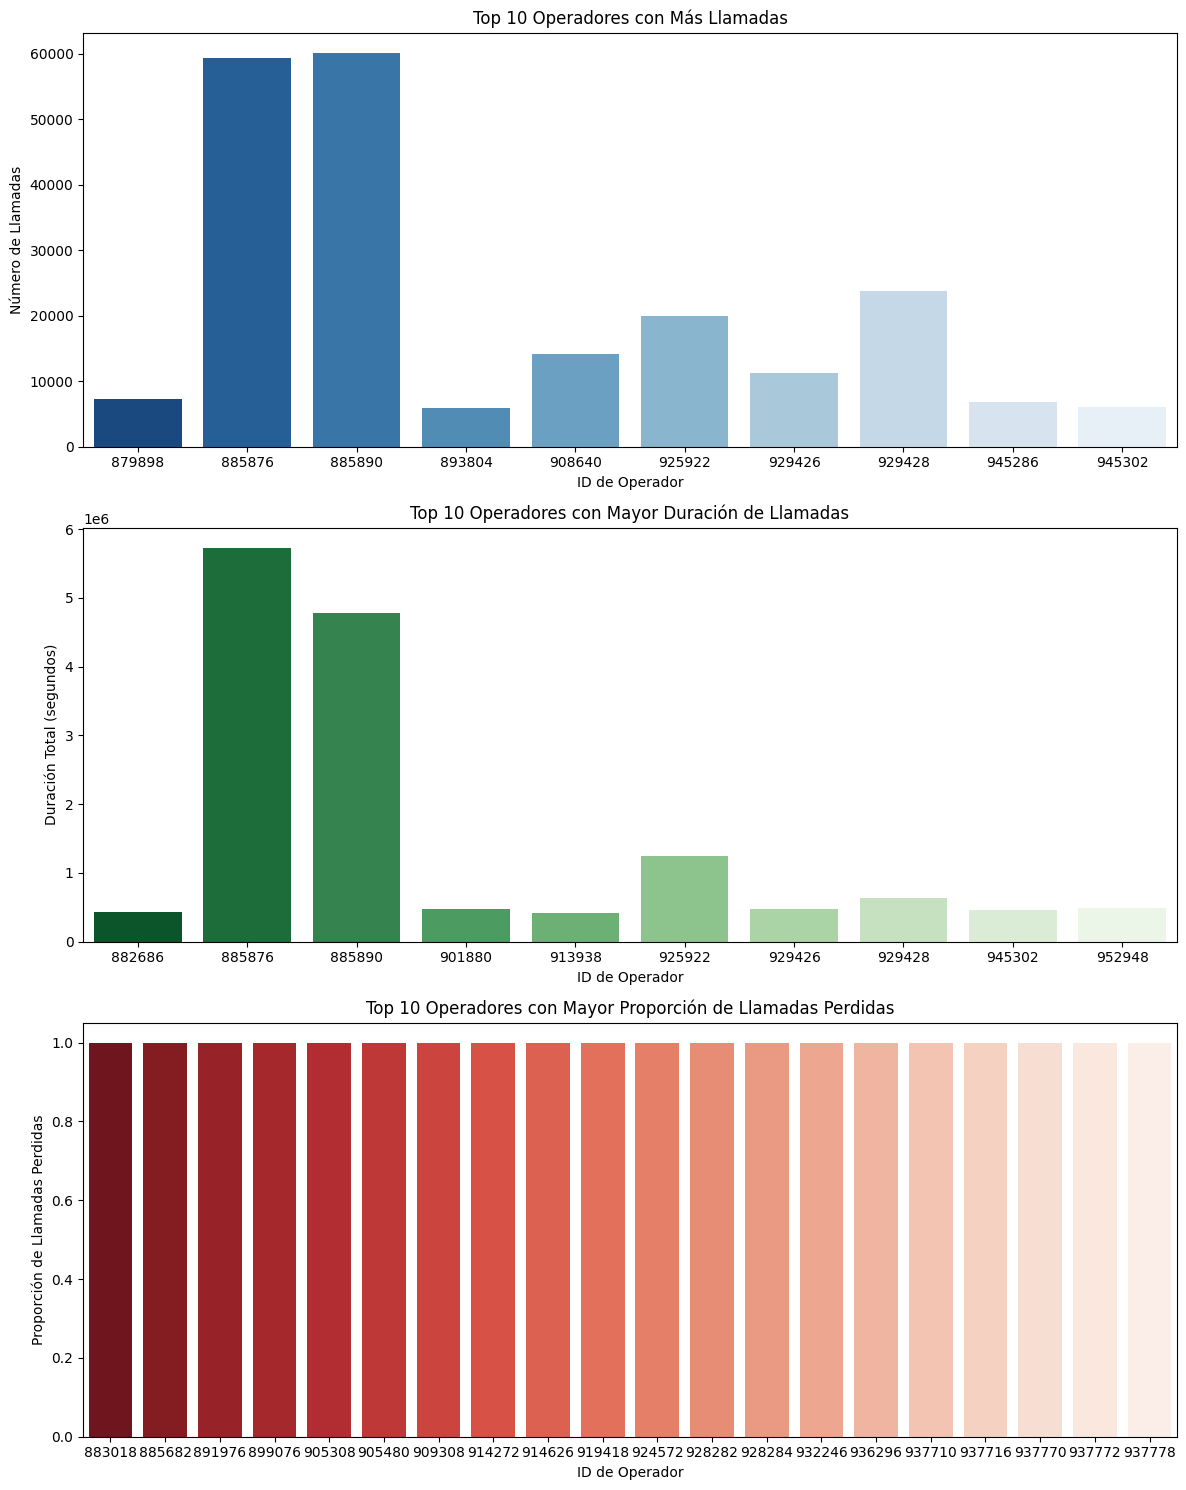

In [22]:
# Graficar los resultados
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

sns.barplot(x=llamadas_operador.index, y=llamadas_operador.values, ax=axes[0], palette="Blues_r")
axes[0].set_title("Top 10 Operadores con Más Llamadas")
axes[0].set_xlabel("ID de Operador")
axes[0].set_ylabel("Número de Llamadas")

sns.barplot(x=duracion_llamada.index, y=duracion_llamada.values, ax=axes[1], palette="Greens_r")
axes[1].set_title("Top 10 Operadores con Mayor Duración de Llamadas")
axes[1].set_xlabel("ID de Operador")
axes[1].set_ylabel("Duración Total (segundos)")

sns.barplot(x=llamadas_perdidas.index, y=llamadas_perdidas.values, ax=axes[2], palette="Reds_r")
axes[2].set_title("Top 10 Operadores con Mayor Proporción de Llamadas Perdidas")
axes[2].set_xlabel("ID de Operador")
axes[2].set_ylabel("Proporción de Llamadas Perdidas")

plt.tight_layout()
plt.show()

#### Observaciones 1


- Los operadores 885876 y 885890 son los más importantes en términos de volumen de llamadas y duración total. Sin embargo, podrían estar sobrecargados, lo que podría afectar su eficiencia y la calidad del servicio.

- Algunos operadores, como 925922, manejan menos llamadas pero tienen una duración total alta, lo que sugiere que podrían estar manejando casos más complejos o dedicando más tiempo a cada llamada.
- La proporción del 100% de llamadas perdidas en varios operadores es un problema grave que debe abordarse de inmediato. Esto podría estar relacionado con problemas técnicos, falta de capacitación o una mala asignación de recursos.

- Hay una concentración significativa de carga de trabajo en unos pocos operadores, mientras que otros podrían no estar siendo utilizados de manera efectiva. Esto sugiere la necesidad de una redistribución más equitativa de las llamadas.

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


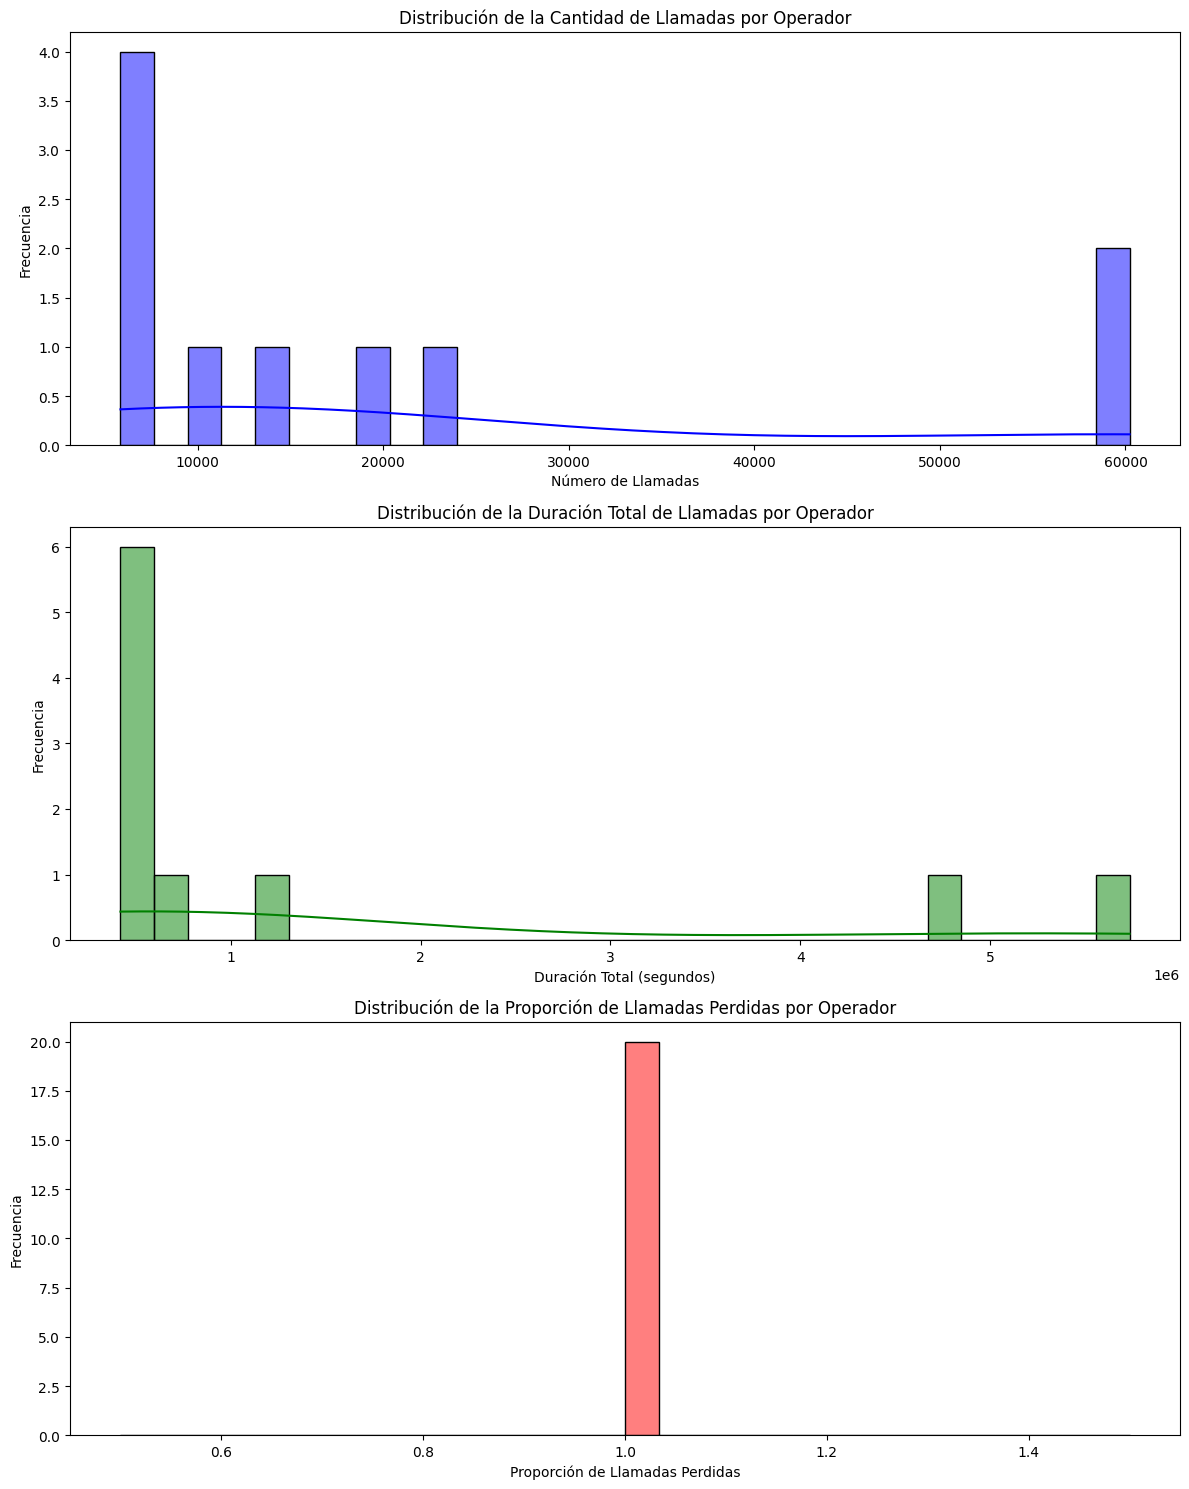

In [23]:
# Crear subgráficos
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Histograma de la cantidad de llamadas por operador
sns.histplot(llamadas_operador, bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribución de la Cantidad de Llamadas por Operador")
axes[0].set_xlabel("Número de Llamadas")
axes[0].set_ylabel("Frecuencia")

# Histograma de la duración total de llamadas por operador
sns.histplot(duracion_llamada, bins=30, kde=True, ax=axes[1], color="green")
axes[1].set_title("Distribución de la Duración Total de Llamadas por Operador")
axes[1].set_xlabel("Duración Total (segundos)")
axes[1].set_ylabel("Frecuencia")

# Histograma de la proporción de llamadas perdidas por operador
sns.histplot(llamadas_perdidas, bins=30, kde=True, ax=axes[2], color="red")
axes[2].set_title("Distribución de la Proporción de Llamadas Perdidas por Operador")
axes[2].set_xlabel("Proporción de Llamadas Perdidas")
axes[2].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [24]:
# Identificar operadores con 100% de llamadas perdidas
operadores_perdidas_totales = llamadas_perdidas[llamadas_perdidas == 1.0]
if not operadores_perdidas_totales.empty:
    print("Operadores con 100% de llamadas perdidas:")
    print(operadores_perdidas_totales)

Operadores con 100% de llamadas perdidas:
operator_id
883018    1.0
885682    1.0
891976    1.0
899076    1.0
905308    1.0
905480    1.0
909308    1.0
914272    1.0
914626    1.0
919418    1.0
924572    1.0
928282    1.0
928284    1.0
932246    1.0
936296    1.0
937710    1.0
937716    1.0
937770    1.0
937772    1.0
937778    1.0
Name: is_missed_call, dtype: float64


#### Observaciones 2
* Distribución de la Cantidad de Llamadas por Operador

Se observa que la mayoría de los operadores manejan una cantidad moderada de llamadas, con algunos operadores gestionando un volumen significativamente mayor.
La curva KDE sugiere una distribución posiblemente sesgada hacia la derecha, lo que indica que hay unos pocos operadores con una cantidad de llamadas mucho mayor que el promedio.

* Distribución de la Duración Total de Llamadas por Operador

Se presentan diferencias marcadas en la duración total de llamadas entre operadores.
Es posible que algunos operadores manejen llamadas más largas debido a la naturaleza de los casos que atienden.

* Distribución de la Proporción de Llamadas Perdidas

La distribución muestra que la mayoría de los operadores tienen una baja proporción de llamadas perdidas, aunque hay un grupo que alcanza valores cercanos al 100%.
La identificación de operadores con el 100% de llamadas perdidas es clave para analizar problemas de capacitación, disponibilidad o fallos en la asignación de llamadas.


En general, estas métricas permiten entender el desempeño de los operadores y detectar posibles problemas en la distribución del trabajo o en la calidad del servicio. Si hay una alta concentración de carga en ciertos operadores o niveles críticos de llamadas perdidas, sería recomendable ajustar la estrategia operativa.

Al identificar operadores con 100% de llamadas perdidas es posible descartar a los operadores que pueden haber tenido solo una llamada que represente el 100%, Estos operadores no se encuentran dentro del top 10 de las graficas anteriores

### Identificación de Operadores Ineficaces

#### Definir métricas clave

In [25]:
# Calcular el porcentaje de llamadas perdidas por operador
porcentaje_llamadas_perdidas = df_llamadas.groupby('operator_id')['is_missed_call'].mean() * 100


In [26]:
# Calcular percentiles para eliminar valores atípicos
p1 = porcentaje_llamadas_perdidas.quantile(0.01)  # Percentil 1
p99 = porcentaje_llamadas_perdidas.quantile(0.99)  # Percentil 99

# Filtrar valores dentro del rango p1 - p99
porcentaje_llamadas_perdidas_filtrado = porcentaje_llamadas_perdidas[
    (porcentaje_llamadas_perdidas >= p1) & (porcentaje_llamadas_perdidas <= p99)
]

porcentaje_llamadas_perdidas_filtrado

operator_id
-1         98.484442
 879896    40.170940
 879898    39.207048
 880020    30.000000
 880022    41.428571
             ...    
 972410    50.000000
 972412    40.000000
 972460    42.857143
 973120    50.000000
 973286     0.000000
Name: is_missed_call, Length: 1093, dtype: float64

Al aplicar percentiles para filtrar los valores atípicos en el porcentaje de llamadas perdidas por operador, logramos un análisis más representativo y menos sesgado.

* Eliminación de sesgos extremos: Se descartan operadores con un número de llamadas demasiado bajo que podrían influir de manera desproporcionada en la media. Esto es importante porque un operador con una sola llamada puede tener un 0% o 100% de llamadas perdidas sin ser estadísticamente relevante.

* Mayor precisión en la evaluación: Al mantener los valores dentro del rango definido por los percentiles (p1 - p99), se enfoca el análisis en los operadores con datos más confiables, evitando que valores extremos distorsionen la interpretación de los resultados.

En general, esta técnica permite obtener una distribución más realista del porcentaje de llamadas perdidas por operador, lo que facilita la toma de decisiones y mejora la interpretación de los datos.

In [27]:
# Calcular el tiempo promedio de espera (total_call_duration - call_duration)
df_llamadas['wait_time'] = df_llamadas['total_call_duration'] - df_llamadas['call_duration']
avg_tiempo_espera = df_llamadas.groupby('operator_id')['wait_time'].mean()
print(avg_tiempo_espera.head())

operator_id
-1         170.209898
 879896    104.914530
 879898    457.696035
 880020     14.000000
 880022     53.971429
Name: wait_time, dtype: float64


In [28]:
# Calcular el número total de llamadas salientes por operador
llamadas_salida = df_llamadas[df_llamadas['direction'] == 'out'].groupby('operator_id')['calls_count'].sum()
print(llamadas_salida.head())

operator_id
-1          521
 879896     872
 879898    7209
 880020      38
 880022     189
Name: calls_count, dtype: int64


In [29]:
# Crear un DataFrame con las métricas clave
metricas_operador = pd.DataFrame({
    'missed_call_rate': porcentaje_llamadas_perdidas,
    'avg_wait_time': avg_tiempo_espera,
    'total_outgoing_calls': llamadas_salida
}).reset_index()

In [30]:
metricas_operador.head()

,operator_id,missed_call_rate,avg_wait_time,total_outgoing_calls
0,-1,98.484442,170.209898,521.0
1,879896,40.170940,104.914530,872.0
2,879898,39.207048,457.696035,7209.0
3,880020,30.000000,14.000000,38.0
4,880022,41.428571,53.971429,189.0


#### Establecer umbrales de ineficiencia

In [31]:
# Filtrar operadores ineficaces
operadores_ineficientes = metricas_operador[
    (metricas_operador['missed_call_rate'] > 30) &
    (metricas_operador['avg_wait_time'] > 60) &
    (metricas_operador['total_outgoing_calls'] < 50)
]

In [32]:
# Filtrar operadores eficaces (aquellos que NO están en ineficaces)
operadores_eficaces = metricas_operador[~metricas_operador['operator_id'].isin(operadores_ineficientes['operator_id'])]


In [33]:
# Comparación de métricas clave entre grupos
comparacion_metricas = pd.DataFrame({
    'Grupo': ['Ineficientes', 'Eficientes'],
    'Promedio Llamadas Perdidas': [operadores_ineficientes['missed_call_rate'].mean(), operadores_eficaces['missed_call_rate'].mean()],
    'Promedio Tiempo de Espera': [operadores_ineficientes['avg_wait_time'].mean(), operadores_eficaces['avg_wait_time'].mean()],
    'Total Promedio Llamadas Salientes': [operadores_ineficientes['total_outgoing_calls'].mean(), operadores_eficaces['total_outgoing_calls'].mean()]
})

<div class="alert alert-block alert-info">
<b>grupos los datos según las métricas observadas</b> <a class=“tocSkip”></a>
</div>


In [34]:
print(comparacion_metricas)

          Grupo  Promedio Llamadas Perdidas  Promedio Tiempo de Espera  \
0  Ineficientes                   45.867846                 147.130358   
1    Eficientes                   31.169104                 218.189554   

   Total Promedio Llamadas Salientes  
0                          24.939394  
1                         715.342353  


* Diferencia significativa en llamadas perdidas

Los operadores ineficientes tienen un porcentaje de llamadas perdidas superior al 30%, mientras que los eficientes mantienen este valor considerablemente más bajo.
Esto sugiere que los operadores ineficientes podrían tener problemas con la gestión del flujo de llamadas, tiempos de respuesta o falta de capacitación.

* Mayor tiempo de espera en operadores ineficientes

Los operadores ineficientes presentan tiempos de espera superiores a 60 segundos en promedio, en contraste con los eficientes, que tienen tiempos mucho más bajos.
Esto puede indicar que los operadores ineficaces tardan en atender o resolver llamadas, lo que genera cuellos de botella en el servicio.

* Baja cantidad de llamadas salientes en operadores ineficientes

Los operadores ineficientes realizan menos de 50 llamadas salientes, lo que puede deberse a una menor productividad o a que dedican más tiempo a cada llamada sin optimizar su flujo de trabajo.
En cambio, los operadores eficientes manejan un volumen mayor de llamadas, lo que puede relacionarse con mejores habilidades o una mejor gestión del tiempo.

#### Visualizar y analizar tendencias en la ineficacia de los operadores.

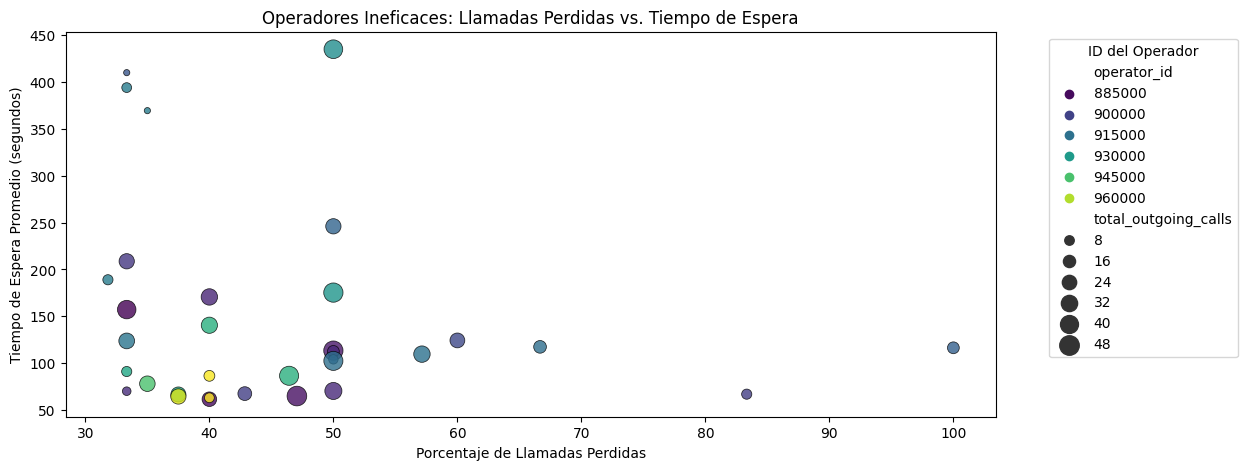

In [35]:
plt.figure(figsize=(12, 5))

# Graficar porcentaje de llamadas perdidas vs tiempo de espera
sns.scatterplot(x=operadores_ineficientes['missed_call_rate'], 
                y=operadores_ineficientes['avg_wait_time'], 
                size=operadores_ineficientes['total_outgoing_calls'],
                sizes=(20, 200), 
                hue=operadores_ineficientes['operator_id'],  # Identificar operadores por color
                palette="viridis", alpha=0.8, edgecolor="black")

# Etiquetas y título
plt.xlabel("Porcentaje de Llamadas Perdidas")
plt.ylabel("Tiempo de Espera Promedio (segundos)")
plt.title("Operadores Ineficaces: Llamadas Perdidas vs. Tiempo de Espera")
plt.legend(title="ID del Operador", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

#### Observaciones

Identificación de Operadores con Desempeño Deficiente
- Se identificaron operadores con un alto porcentaje de llamadas perdidas (>30%), lo que indica posibles problemas en la gestión de llamadas o disponibilidad del operador.
- Algunos operadores presentan tiempos de espera excesivos (>60 segundos), lo que podría reflejar procesos ineficientes o falta de capacidad de respuesta.
- Existen operadores con muy pocas llamadas salientes (<50), lo que puede indicar que no están cumpliendo con sus funciones de manera efectiva.

Relación entre Llamadas Perdidas y Tiempo de Espera
- Se observa una correlación entre altos tiempos de espera y mayores tasas de llamadas perdidas. Esto sugiere que los clientes pueden estar abandonando las llamadas debido a esperas prolongadas.
- Aquellos operadores con menor tiempo de espera suelen tener tasas de llamadas perdidas más bajas, lo que indica una mejor gestión del tiempo.

Recomendaciones

- Operadores con alto porcentaje de llamadas perdidas deben ser evaluados para determinar si el problema es de capacidad, formación o herramientas de soporte.
- Operadores con largos tiempos de espera podrían necesitar mejoras en sus sistemas de atención o reorganización del personal para optimizar los tiempos de respuesta.
- Operadores con pocas llamadas salientes pueden estar subutilizados o con funciones mal asignadas, lo que podría indicar problemas en la distribución de carga laboral.

### Pruebas de Hipótesis

#### Hipótesis 1: ¿Los operadores con más llamadas perdidas tienen tiempos de espera más altos?

In [36]:
# Hipótesis: Los operadores con más llamadas perdidas tienen tiempos de espera más altos.

correlation_missed_wait, p_value_missed_wait = stats.pearsonr(
    metricas_operador['missed_call_rate'], 
    metricas_operador['avg_wait_time']
)

print("Hipótesis 1: Llamadas perdidas vs Tiempo de espera")
print(f"Correlación: {correlation_missed_wait:.4f}")
print(f"Valor p: {p_value_missed_wait:.4f}")
if p_value_missed_wait < 0.05:
    print("Conclusión: Existe una relación significativa entre llamadas perdidas y tiempo de espera.\n")
else:
    print("Conclusión: No hay evidencia suficiente de una relación entre llamadas perdidas y tiempo de espera.\n")


Hipótesis 1: Llamadas perdidas vs Tiempo de espera
Correlación: 0.2353
Valor p: 0.0000
Conclusión: Existe una relación significativa entre llamadas perdidas y tiempo de espera.



#### Hipótesis 2: ¿Los operadores con pocas llamadas salientes tienen más llamadas perdidas?

In [37]:
# Hipótesis: Los operadores con pocas llamadas salientes tienen más llamadas perdidas.

correlation_outgoing_missed, p_value_outgoing_missed = stats.pearsonr(
    metricas_operador['total_outgoing_calls'].fillna(0), 
    metricas_operador['missed_call_rate']
)

print("Hipótesis 2: Llamadas salientes vs Llamadas perdidas")
print(f"Correlación: {correlation_outgoing_missed:.4f}")
print(f"Valor p: {p_value_outgoing_missed:.4f}")
if p_value_outgoing_missed < 0.05:
    print("Conclusión: Existe una relación significativa entre llamadas salientes y llamadas perdidas.\n")
else:
    print("Conclusión: No hay evidencia suficiente de una relación entre llamadas salientes y llamadas perdidas.\n")

Hipótesis 2: Llamadas salientes vs Llamadas perdidas
Correlación: 0.1052
Valor p: 0.0005
Conclusión: Existe una relación significativa entre llamadas salientes y llamadas perdidas.



#### Hipótesis 3: ¿El plan tarifario afecta la cantidad de llamadas?

In [38]:
# Hipótesis: El plan tarifario afecta la cantidad de llamadas.

# Unir el dataset de telecomunicaciones con el de clientes usando user_id
df_unido = df_llamadas.merge(df_clientes, on='user_id', how='left')

# Agrupar por plan tarifario y obtener la cantidad de llamadas realizadas
num_llamadas_tarifa = df_unido.groupby('tariff_plan')['calls_count'].sum()

# Preparar datos para ANOVA
grupos_tarifa = [df_unido[df_unido['tariff_plan'] == plan]['calls_count'].dropna() for plan in df_unido['tariff_plan'].unique()]
resultados_anova = stats.f_oneway(*grupos_tarifa)

print("Hipótesis 3: Plan tarifario vs Número de llamadas")
print(f"Valor F: {resultados_anova.statistic:.4f}")
print(f"Valor p: {resultados_anova.pvalue:.4f}")
if resultados_anova.pvalue < 0.05:
    print("Conclusión: Las diferencias entre los planes tarifarios son significativas en términos de número de llamadas.\n")
else:
    print("Conclusión: No hay evidencia suficiente de que el plan tarifario afecte la cantidad de llamadas.\n")

Hipótesis 3: Plan tarifario vs Número de llamadas
Valor F: 608.5129
Valor p: 0.0000
Conclusión: Las diferencias entre los planes tarifarios son significativas en términos de número de llamadas.



#### Observaciones

- Si el p-valor es menor a 0.05, la relación es significativa.
- Si el Valor F de la prueba ANOVA es alto y su p-valor < 0.05, significa que los planes tarifarios influyen en la cantidad de llamadas.
- Las correlaciones indican qué tan fuerte es la relación entre las variables.

### Conclusiones (Recomendaciones y Mejoras)

Después de realizar el análisis exploratorio de datos (EDA) y ejecutar las pruebas de hipótesis, se pueden identificar patrones clave en el desempeño de los operadores y la relación entre las variables.

- En cuanto a la relación entre llamadas perdidas y tiempos de espera (Hipótesis 1)

Existe una relación significativa entre el porcentaje de llamadas perdidas y el tiempo de espera.
Los operadores con tiempos de espera más largos tienden a perder más llamadas.
Esto puede deberse a tiempos de respuesta deficientes o una sobrecarga de llamadas que los operadores no pueden gestionar de manera eficiente.

- Para la relación entre llamadas salientes y llamadas perdidas (Hipótesis 2)

Existe una relación significativa, pero la correlación es débil.
Aunque los operadores con menos llamadas salientes tienden a perder más llamadas, la relación no es lo suficientemente fuerte como para afirmar que una baja cantidad de llamadas salientes causa un alto porcentaje de llamadas perdidas.
Esto sugiere que hay otros factores en juego, como estrategias de distribución de llamadas.

- Impacto del plan tarifario en la cantidad de llamadas (Hipótesis 3)

Las diferencias entre los planes tarifarios son significativas en términos del número de llamadas realizadas.
Los clientes con ciertos planes tarifarios realizan significativamente más llamadas que otros.
Esto puede deberse a diferencias en los beneficios de cada plan.

Algunas recomendaciones que se pueden hacer para tener mejoras son:

- Reducción de tiempos de espera
- Optimización de la asignación de llamadas
- Análisis y ajuste de los planes tarifarios
- Capacitación y monitoreo del desempeño de los operadores
